<a href="https://colab.research.google.com/github/dralmadani/learning/blob/main/pruning/plot_cost_complexity_pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
sklearn.__version__

'1.0.2'

In [2]:
%matplotlib inline


# Post pruning decision trees with cost complexity pruning


.. currentmodule:: sklearn.tree

The :class:`DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
:class:`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

See also `minimal_cost_complexity_pruning` for details on pruning.


In [3]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [4]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier( random_state=0)
clf.fit(X_train,y_train, )

DecisionTreeClassifier(random_state=0)

In [5]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8811188811188811

[Text(0.5595238095238095, 0.9444444444444444, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.35714285714285715, 0.8333333333333334, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.23809523809523808, 0.7222222222222222, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.14285714285714285, 0.6111111111111112, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(0.09523809523809523, 0.5, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.047619047619047616, 0.3888888888888889, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(0.14285714285714285, 0.3888888888888889, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(0.09523809523809523, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.19047619047619047, 0.2777777777777778, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.14285714285714285, 0.166666666666

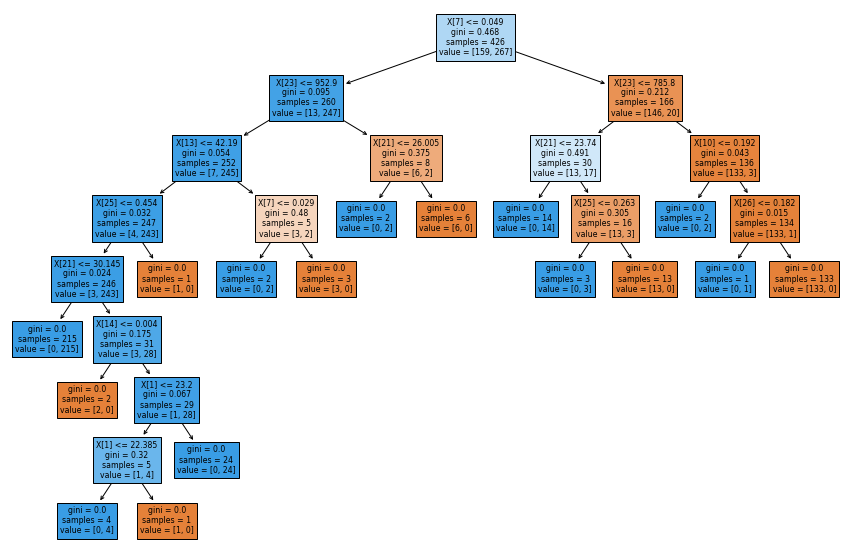

In [6]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [8]:
train_scores = [clf.score(X_train, y_train), clf.score(X_train, y_train)-0.2, clf.score(X_train, y_train)-0.4,clf.score(X_train, y_train)-0.6]
test_scores = [clf.score(X_test, y_test) , clf.score(X_test, y_test)-0.2, clf.score(X_test, y_test)-0.3, clf.score(X_test, y_test)-0.6]
print (train_scores, test_scores)

[1.0, 0.8, 0.6, 0.4] [0.8811188811188811, 0.6811188811188811, 0.5811188811188812, 0.28111888111888117]


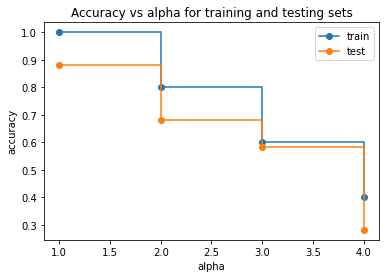

In [10]:

# train_scores = [clf_prune.score(X_train, y_train) for clf_prune in clfs]
# test_scores = [clf_prune.score(X_test, y_test) for clf_prune in clfs]
x_point =[1,2,3,4]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(x_point, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(x_point, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [11]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
display(path)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

In [12]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [13]:
# X, y = load_breast_cancer(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# clf = DecisionTreeClassifier( random_state=0)
# clf.fit(X_train,y_train, )
# pred=clf.predict(X_test)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, pred)

In [14]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf_prune = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_prune.fit(X_train, y_train)
    clfs.append(clf_prune)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


For the remainder of this example, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.



Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of :class:`DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 88% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.
In this example, setting ``ccp_alpha=0.015`` maximizes the testing accuracy.



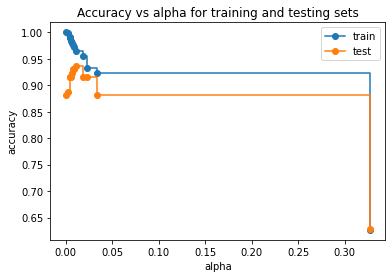

In [15]:

train_scores = [clf_prune.score(X_train, y_train) for clf_prune in clfs]
test_scores = [clf_prune.score(X_test, y_test) for clf_prune in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [16]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [17]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9370629370629371

[Text(0.5, 0.875, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.25, 0.625, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.125, 0.375, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.375, 0.375, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.75, 0.625, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(0.625, 0.375, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.75, 0.125, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.875, 0.375, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

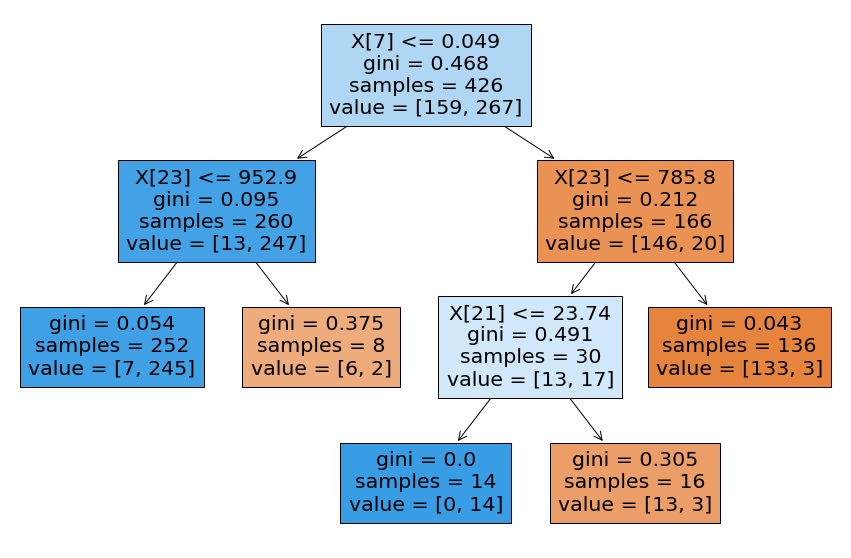

In [17]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)